In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install panel

In [2]:
#Jeffrey Tan
#CIS 4170 Presentation

In [3]:
import pandas as pd
import seaborn as sns
import panel as pn
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')


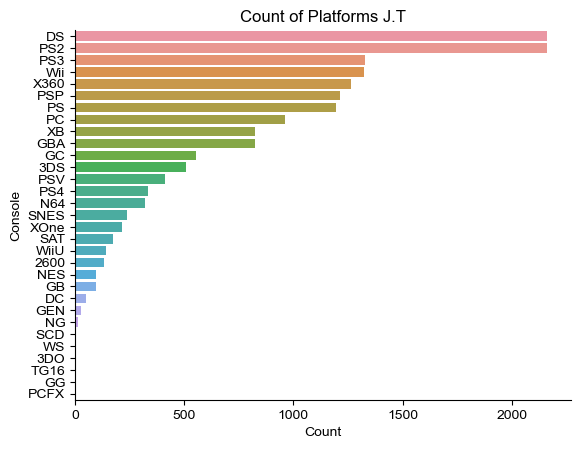

In [4]:
popular_consoles = df['Platform'].value_counts().sort_values(ascending=False)

sns.countplot(y='Platform', data=df, order=popular_consoles.index)
sns.set_style('whitegrid')
sns.despine()

plt.title('Count of Platforms J.T')
plt.xlabel('Count')
plt.ylabel('Console')

plt.show()

In [5]:
#Limit the years from 1980 to 2017 because that is the years there is data
df = df[(df.Year >= 1980) & (df.Year <= 2017)]

In [6]:
#function that gives the top platforms by global sales for a given year
def get_top_platforms(year, num_platforms):
    year_df = df[df.Year == year]
    platform_sales = year_df.groupby('Platform')['Global_Sales'].sum().reset_index()
    platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False).head(num_platforms)
    return platform_sales

#function that creates a seaborn bar plot of the top platforms by global sales for a given year
def plot_top_platforms(year, num_platforms):
    platform_sales = get_top_platforms(year, num_platforms)
    plot = sns.barplot(data=platform_sales, x='Global_Sales', y='Platform', order=platform_sales['Platform'])
    plot.set_title(f'Top {num_platforms} Platforms by Global Sales in {year} J.T')
    return plot

In [7]:
# create the two sliders
year_slider = pn.widgets.IntSlider(name='Year', start=1980, end=2017, step=1, value=2016)
num_platforms_slider = pn.widgets.IntSlider(name='Number of Top Platforms', start=1, end=10, step=1, value=3)

Column
    [0] IntSlider(end=2017, name='Year', start=1980, value=2016)
    [1] IntSlider(end=10, name='Number of Top Platforms', start=1, value=3)
    [2] ParamFunction(function)

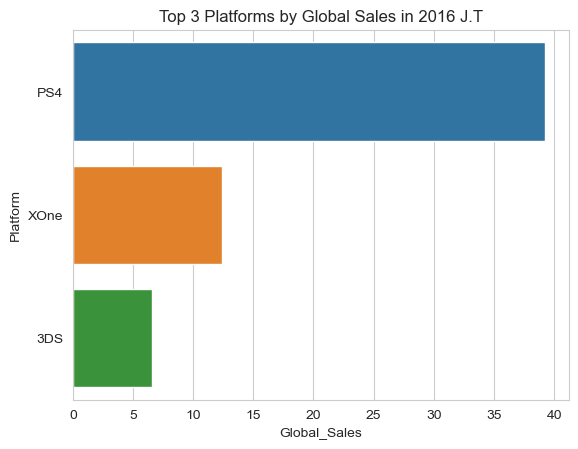

In [8]:
#Load into jupyter notebook
pn.extension()

#Reactive function depends on value of slider
@pn.depends(year_slider.param.value, num_platforms_slider.param.value)
def update_plot(year, num_platforms):
    return plot_top_platforms(year, num_platforms)

interactive_plot = pn.Column(year_slider, num_platforms_slider, update_plot)

interactive_plot.servable()